In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [3]:
sd_hf = model_hf.state_dict()

In [36]:
import torch.nn as nn
import torch

In [ ]:
from dataclasses import dataclass

@dataclass
class GPTConfig:
    block_size: int = 1024
    vocab_size: int = 50257
    n_embd: int = 768
    batch_size: int = 1
    
config = GPTConfig

In [ ]:



x.shape

torch.Size([1, 1024])

In [59]:
class GPT(nn.Module):
    def __init__(self):
        super().__init__()
        self.config = config
        self.transformer = nn.ModuleDict(dict(
             wte = nn.Embedding(config.vocab_size, config.n_embd),
             wpe = nn.Embedding(config.block_size, config.n_embd),
             h = nn.ModuleList(TransformerBlock(config) for _ in range(config.n_l
        ))
        self.position_input = torch.tensor(range(config.block_size))
        
    def forward(self, x):
        
        embedding = self.transformer.wte(x) + self.transformer.wpe(self.position_input)
       

In [60]:
gpt = GPT()
x = torch.randint(0, config.vocab_size, (config.batch_size, config.block_size))

In [61]:
gpt(x).shape

torch.Size([1, 1024, 768])

In [ ]:
gpt.transformer

{'wte': Embedding(50257, 768), 'wpe': Embedding(1024, 768)}

In [4]:

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

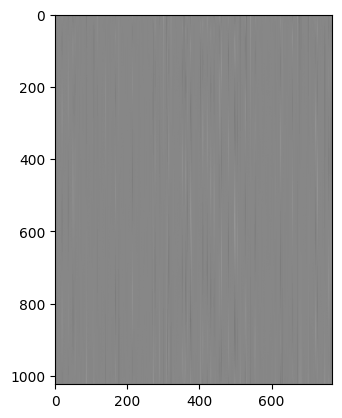

In [5]:
import matplotlib.pyplot as plt

plt.imshow(sd_hf["transformer.wpe.weight"],cmap="gray")

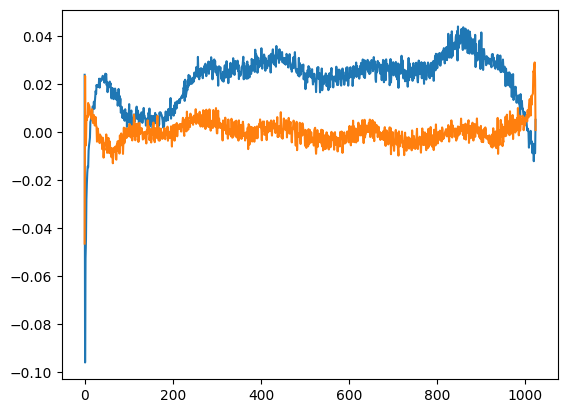

In [18]:
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])


In [33]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
print(generator("Salve a tutti", max_length=1000, num_return_sequences=1)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Salve a tutti:

4. A short-term change to a training plan should be in the cards. The long-term goal for the new coach/coach?

The longer-term goal for your team / squad?

We are not talking about just one player in this, but two.

On the short-term, the biggest change that I would make to your team this offseason is that your offensive line will play like a 4-3 under center. We saw last season that you took the edge off of Jameis Winston and turned it over to your 3-4 defense. This will help you see to what role the line can fill this season. I know that has been reported, so feel free to correct me if I am wrong or feel bad doing so. We have a small staff already and our position depth also means that when it comes to making the moves, we will be able make those moves. I would like to think that we could put more young bodies on the field, get better on the fly, and not be rushed to start every game but that will probably be the case with us.

With the big decision that your offseaso